In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from utils.dataPreprocessing import data_preprocessing

In [6]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [7]:
def plot_grid_search_single_param(cv_results, grid_param, name_param, figsize=(10, 6)):
    # Get Test Scores Mean for each grid search
    scores_mean = cv_results['mean_test_score']

    # Plot the 2D curve
    plt.figure(figsize=figsize)
    plt.plot(grid_param, scores_mean, '-o')

    # Add labels and a title
    plt.xlabel(name_param)
    plt.ylabel('CV Average Accuracy')
    plt.title("Grid Search Accuracy", fontsize=12, fontweight='bold')
    
    plt.grid(True)
    plt.show()

# Training and test data generation

In [8]:
X, t = data_preprocessing(df_data, normalized=True, one_hot=False)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [9]:
print("size X_train: "+str(X_train.shape))
print("size t_train: "+str(t_train.shape))
print()
print("size X_test: "+str(X_test.shape))
print("size t_test: "+str(t_test.shape))

size X_train: (693, 192)
size t_train: (693,)

size X_test: (297, 192)
size t_test: (297,)


# Data visualization

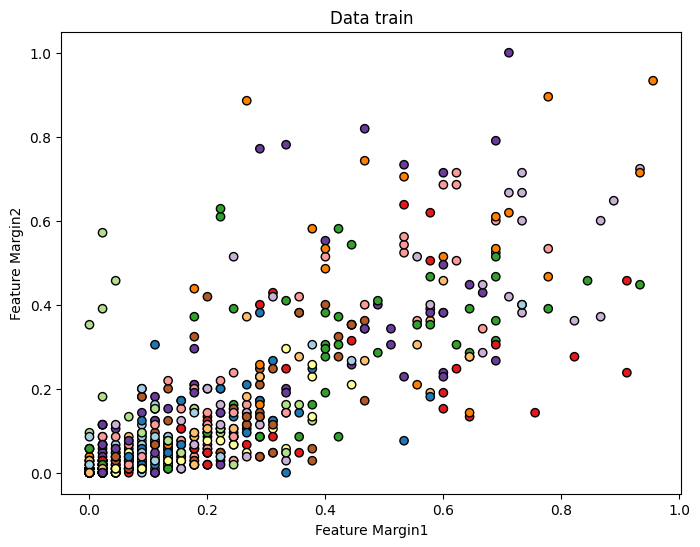

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Data train')
plt.xlabel('Feature Margin1')
plt.ylabel('Feature Margin2')
plt.show()

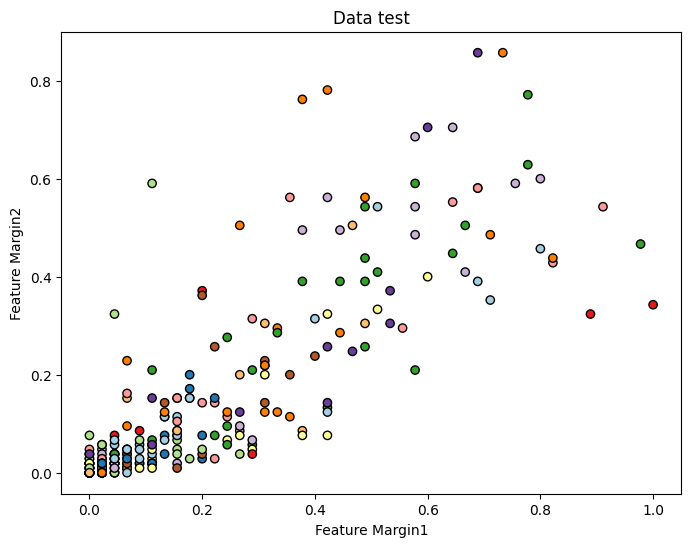

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=t_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Data test')
plt.xlabel('Feature Margin1')
plt.ylabel('Feature Margin2')
plt.show()

# Model training

In [12]:
#First training without hyperparameter optimization
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, t_train)

print("Score X_train, t_train : {:.2f}%".format(model.score(X_train, t_train)*100))

Score X_train, t_train : 99.86%


In [13]:
print("Score X_test, t_test : {:.2f}%".format(model.score(X_test, t_test)*100))

Score X_test, t_test : 94.61%


We see that the accuracy is very low, so we use GridSearchCV to find the best hyperparameter C for the best accuracy.

In [20]:
#Parameter to test
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 15]  #Inverse of regularization strength
}

#Creating the grid search model
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000), param_grid, cv=5, verbose=3, n_jobs=-1)

#Model training with grid search
grid_search.fit(X_train, t_train)

#Split display according to C parameter
results = pd.DataFrame.from_dict(grid_search.cv_results_)
print(results)

#Better parameters and precision
print("Meilleur paramètre:", grid_search.best_params_)
print("Meilleure précision:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\thoma\Documents\TechniqueApprentissage\technique_apprentissage_projet\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.967244      0.287930         0.042618        0.047274    0.01   
1       2.143306      0.506163         0.005804        0.001845     0.1   
2       3.218144      0.277688         0.006402        0.000800       1   
3       4.473921      0.569948         0.010223        0.011224       5   
4       4.789689      0.519045         0.008192        0.005074      10   
5       3.593734      0.571471         0.002801        0.000981      15   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.158273           0.143885           0.172662   
1   {'C': 0.1}           0.647482           0.604317           0.618705   
2     {'C': 1}           0.978417           0.956835           0.985612   
3     {'C': 5}           0.985612           0.978417           1.000000   
4    {'C': 10}           0.985612           0.978417           0.992806   
5    {'C': 15}          

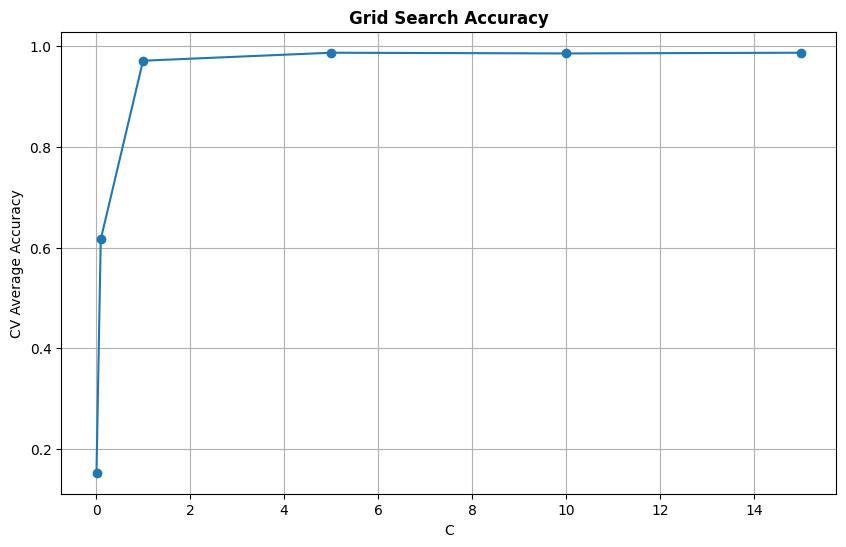

In [25]:
plot_grid_search_single_param(results, param_grid['C'], 'C')

In [22]:
#We train the model with the best parameter C
model = LogisticRegression(multi_class='multinomial',max_iter=1000, C=5, n_jobs=-1)
model.fit(X_train,t_train)
model.score(X_train,t_train)

1.0

# Model evaluation

In [23]:
print("Score X_test, t_test : {:.2f}%".format(model.score(X_test,t_test)*100))

Score X_test, t_test : 96.97%
